In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Game simulation

In [2]:
def roulette_simulation(N):
    black_numbers = {2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35}
    red_numbers = {1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}
    green_numbers = {0, 100} 
    
    earnings = 0
    
    for _ in range(N):
        outcome = random.choice(list(black_numbers | red_numbers | green_numbers))  # Simulating the wheel spin
        
        if outcome in black_numbers:
            earnings += 1  # Win: gain 1 dollar
        else:
            earnings -= 1  # Lose: lose 1 dollar
    
    return earnings

##  Monte Carlo simulation

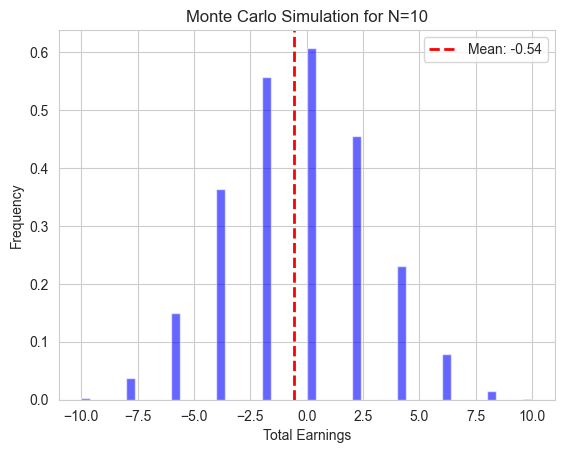

N=10 -> Mean: -0.54, Standard error: 0.01, STD3.157088066937633


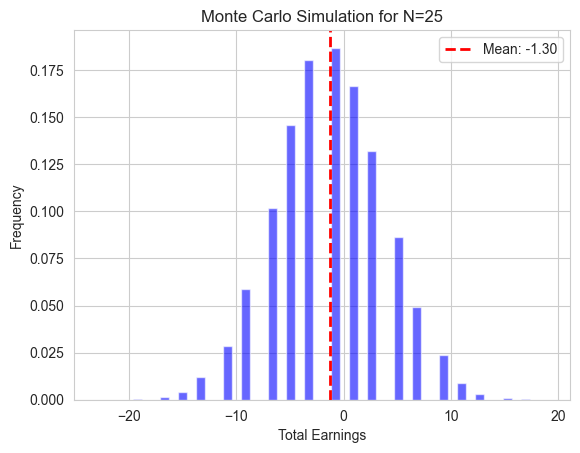

N=25 -> Mean: -1.30, Standard error: 0.02, STD4.995377160175195


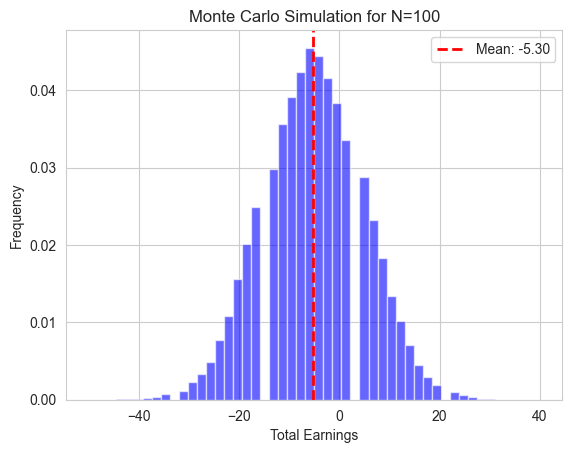

N=100 -> Mean: -5.30, Standard error: 0.03, STD9.987808125589918


In [3]:
def monte_carlo_simulation(N, num_simulations=100000):
    results = [roulette_simulation(N) for _ in range(num_simulations)]

    mean_earnings = np.mean(results)
    std = np.std(results)
    standard_error_earnings = np.std(results) / (math.sqrt(num_simulations))
    
    plt.hist(results, bins=50, density=True, alpha=0.6, color='b')
    plt.xlabel('Total Earnings')
    plt.ylabel('Frequency')
    plt.title(f'Monte Carlo Simulation for N={N}')
    plt.axvline(mean_earnings, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_earnings:.2f}')
    plt.legend()
    plt.show()
    
    print(f'N={N} -> Mean: {mean_earnings:.2f}, Standard error: {standard_error_earnings:.2f}, STD{std}')

# Running simulations for different N values
for N in [10, 25, 100]:
    monte_carlo_simulation(N)

As N increases, the distributions appear to become more symmetric and closer to a normal distribution. 

`Means`: As 𝑁 increases, the means of the distributions should converge to a stable value. This is due to the law of large numbers, which states that the sample mean will converge to the expected value as the sample size increases.

`Standard Errors`: We expected the error to decrease as n became larger because it has an inverse relationship with the square root of this value, but the simulation does not show this.

## Game simulation for average winnings

In [4]:
def roulette_simulation_average_winnigs(N):
    black_numbers = {2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35}
    red_numbers = {1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}
    green_numbers = {0, 100}  # 00 is represented as a string
    
    earnings = 0
    
    for _ in range(N):
        outcome = random.choice(list(black_numbers | red_numbers | green_numbers))  # Simulating the wheel spin
        
        if outcome in black_numbers:
            earnings += 1  # Win: win 1 dollar
        else:
            earnings -= 1  # Lose: lose 1 dollar
    
    average_winnings = (earnings/N)
    return average_winnings

## Monte Carle simulation

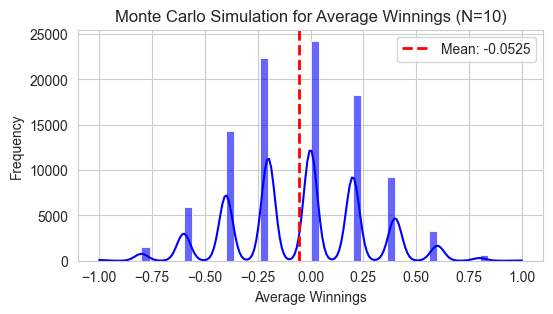

N=10 -> Mean Avg Winnings: -0.0525, Standard error: 0.0010


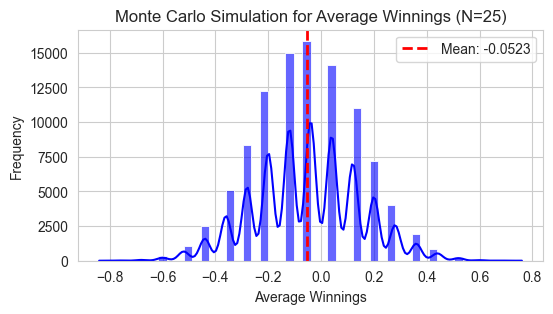

N=25 -> Mean Avg Winnings: -0.0523, Standard error: 0.0006


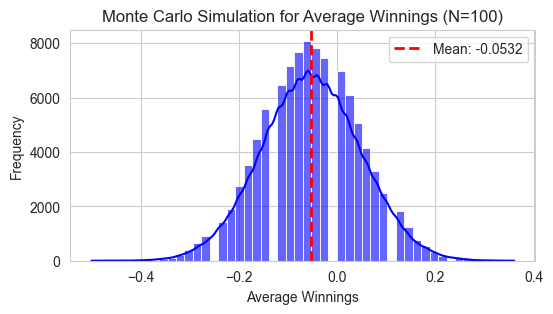

N=100 -> Mean Avg Winnings: -0.0532, Standard error: 0.0003


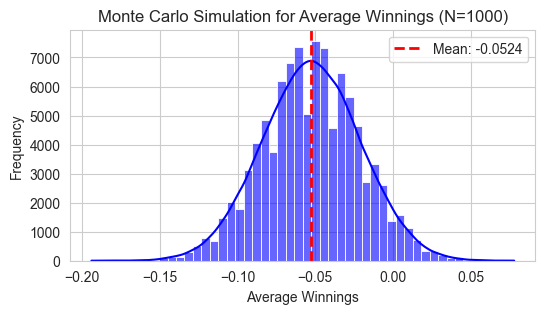

N=1000 -> Mean Avg Winnings: -0.0524, Standard error: 0.0001


In [5]:
def monte_carlo_simulation(N, num_simulations=100000):
    results = [roulette_simulation_average_winnigs(N) for _ in range(num_simulations)]
    
    mean_avg_winnings = np.mean(results)
    standard_error_earnings = np.std(results) / (math.sqrt(num_simulations))
    
    plt.figure(figsize=(6, 3))
    sns.histplot(results, bins=50, kde=True, color='blue', alpha=0.6)
    plt.xlabel('Average Winnings')
    plt.ylabel('Frequency')
    plt.title(f'Monte Carlo Simulation for Average Winnings (N={N})')
    plt.axvline(mean_avg_winnings, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_avg_winnings:.4f}')
    plt.legend()
    plt.show()
    
    print(f'N={N} -> Mean Avg Winnings: {mean_avg_winnings:.4f}, Standard error: {standard_error_earnings:.4f}')

# Running simulations for different N values
for N in [10, 25, 100, 1000]:
    monte_carlo_simulation(N)

`mean`: The means remain relatively stable and close to each other as (N) increases. This indicates that the total earnings are consistently centered around a similar value, showing no significant drift or bias as the sample size increases.

`standard error`: The standard errors decrease as N increases, indicating more precise estimates of the mean total earnings with larger sample sizes. This aligns with the expected behavior, as larger samples tend to provide more accurate estimates.

## Theoretical expected values and Standard errors

In [6]:
def theoretical_expected_and_standard_error(N):
    outcome = np.random.choice([-1, 1], size=(N), p=[20/38, 18/38])

    profit_or_loss = np.mean(outcome).round(2)
    
    std = outcome.std()
    
    standard_error = ( std / (math.sqrt(N))).round(2)

    print(f"N = {N}")
    print(f"Mean: {profit_or_loss}")
    print(f"standard error: {standard_error}")

for N in [10, 25, 100, 1000]:
    theoretical_expected_and_standard_error(N)
    print('------------------------------------')

N = 10
Mean: 0.0
standard error: 0.32
------------------------------------
N = 25
Mean: -0.12
standard error: 0.2
------------------------------------
N = 100
Mean: -0.1
standard error: 0.1
------------------------------------
N = 1000
Mean: -0.07
standard error: 0.03
------------------------------------


The `mean` and `standard error` are approximately equal to the values ​​we obtained in the simulator.

## the probability that the casino loses money for N=25

In [7]:
def monte_carlo_simulation(N, num_simulations=100000):
    outcomes = np.random.choice([-1, 1], size=(num_simulations, N), p=[20/38, 18/38])
    total_earnings = outcomes.sum(axis=1)
    probability_losing_money = np.mean(total_earnings > 0)
    return probability_losing_money.round(2)

N = 25
probability_losing_money = monte_carlo_simulation(N)
print(f"Probability that the casino loses money for N={N}: {probability_losing_money:.4f}")


Probability that the casino loses money for N=25: 0.3900


## The probability that the casino loses money for different N

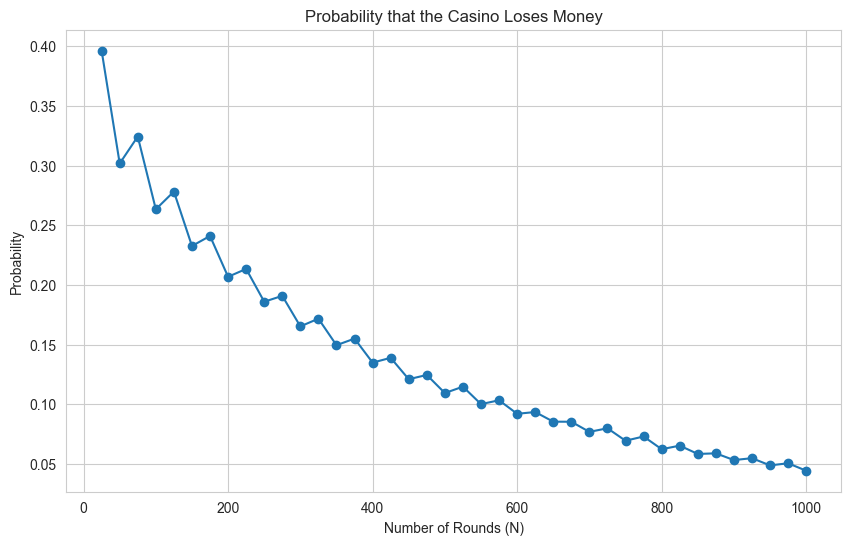

In [8]:
def monte_carlo_probabilities(start_N, end_N, step, num_simulations=100000):
    probabilities = []
    for N in range(start_N, end_N + 1, step):
        outcomes = np.random.choice([-1, 1], size=(num_simulations, N), p=[20/38, 18/38])
        total_earnings = outcomes.sum(axis=1)
        probability_losing_money = np.mean(total_earnings > 0)
        probabilities.append(probability_losing_money)
    return probabilities


start_N = 25
end_N = 1000
step = 25

probabilities = monte_carlo_probabilities(start_N, end_N, step)

plt.figure(figsize=(10, 6))
plt.plot(range(start_N, end_N + 1, step), probabilities, marker='o', linestyle='-')
plt.title('Probability that the Casino Loses Money')
plt.xlabel('Number of Rounds (N)')
plt.ylabel('Probability')
plt.show()


Based on the plot, which shows that the probability of the casino losing money decreases as the number of rounds increases, we can derive a clear explanation for why casinos might encourage players to continue betting. The plot illustrates that as the number of betting rounds (N) increases, the probability that the casino loses money decreases significantly. Initially, the probability is relatively high (around 0.40) but drops to around 0.05 for a large number of rounds (N=1000).